Autoencoders

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2775 - val_loss: 0.1933
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1733 - val_loss: 0.1556
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1455 - val_loss: 0.1345
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1292 - val_loss: 0.1219
Epoch 5/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1188 - val_loss: 0.1136
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1115 - val_loss: 0.1075
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1062 - val_loss: 0.1028
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1023 - val_loss: 0.0995
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0996 - val_loss: 0.0973
Epoch 10/50
235/235 [============

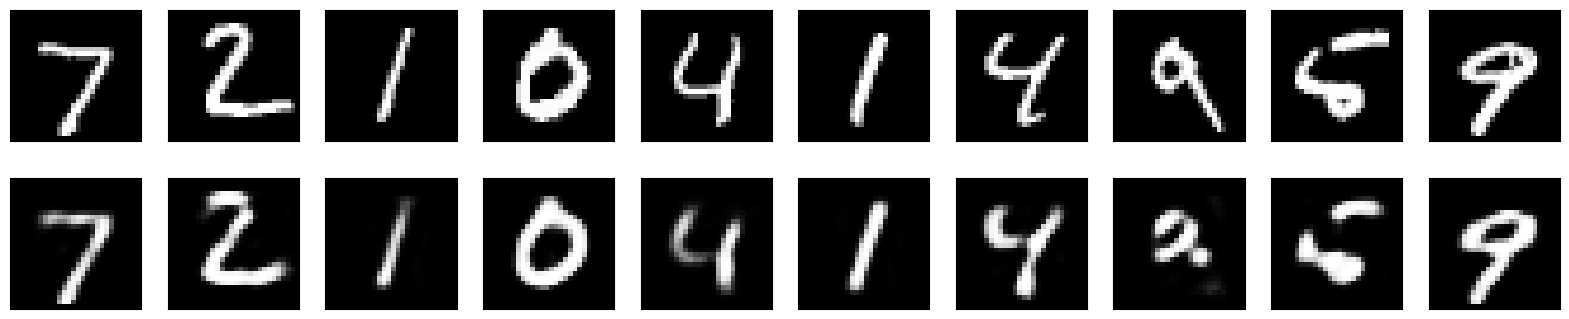

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Load the dataset (e.g., images of numbers from 0 to 9)
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images into a 1D array
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder model
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some test images
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

# Display some example images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/50
391/391 [==============================] - 87s 220ms/step - loss: 0.0133 - val_loss: 0.0086
Epoch 2/50
391/391 [==============================] - 88s 224ms/step - loss: 0.0081 - val_loss: 0.0075
Epoch 3/50
391/391 [==============================] - 86s 220ms/step - loss: 0.0073 - val_loss: 0.0070
Epoch 4/50
391/391 [==============================] - 89s 228ms/step - loss: 0.0069 - val_loss: 0.0067
Epoch 5/50
391/391 [==============================] - 88s 226ms/step - loss: 0.0066 - val_loss: 0.0065
Epoch 6/50
391/391 [==============================] - 88s 226ms/step - loss: 0.0064 - val_loss: 0.0063
Epoch 7/50
391/391 [==============================] - 88s 226ms/step - loss: 0.0063 - val_loss: 0.0062
Epoch 8/50
391/391 [==============================] - 88s 225ms/step - loss: 0.0061 - val_loss: 0.0060
Epoch 9/50
391/391 [==============================] - 87s 222ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 

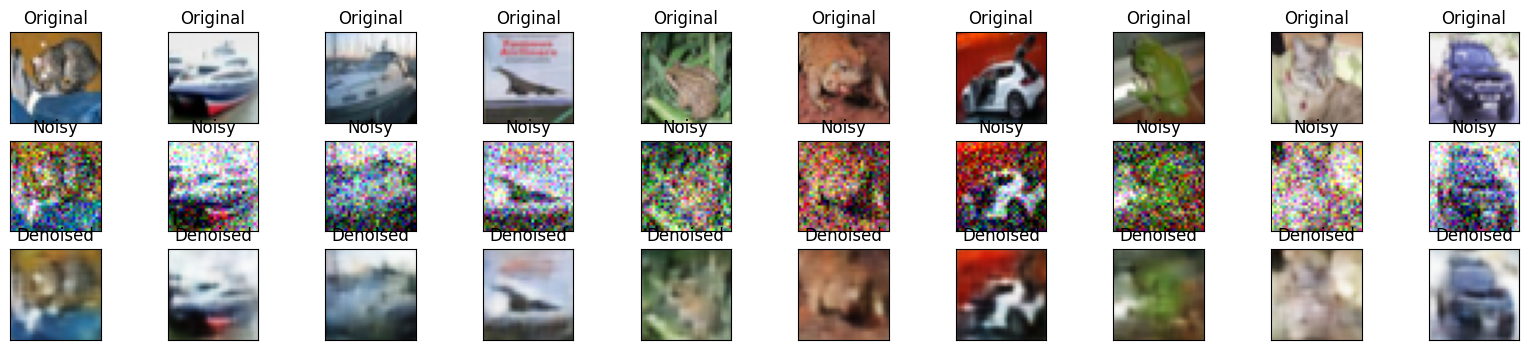

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

# Load and preprocess the CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add Gaussian noise to the images
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

# Define the autoencoder model
input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))

# Denoise test images
denoised_images = autoencoder.predict(x_test_noisy)

# Visualize original, noisy, and denoised images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i])
    plt.title("Denoised")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
